In [1]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.plots as plots
import healpy as hp

In [2]:
nside = 64
# Connect to an opsim database, bleeding-edge sims here: 
# https://lsst-web.ncsa.illinois.edu/sim-data/sims_featureScheduler_runs/
opsdb = db.OpsimDatabase('baseline_1exp_pairsmix_10yrs.db')
outDir = 'maf_out'
resultsDb = db.ResultsDb(outDir=outDir)
plotFuncs = [plots.TwoDMap()]

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database SummaryAllProps with constraint filter = "i" for columns ['fieldDec', 'fieldRA', 'night', 'fiveSigmaDepth']
Found 554977 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter = "i"" constraint now.
Plotting complete.


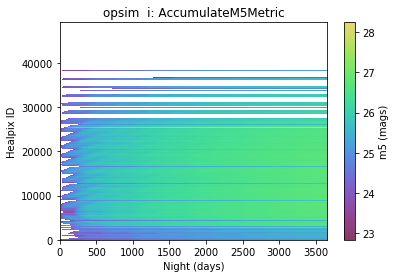

In [3]:
# Set metric to compute accumulated coadded depth per day for 10 years
metric = metrics.AccumulateM5Metric(bins=np.arange(366*10))
slicer = slicers.HealpixSlicer(nside=nside)
plotDict = {'xlabel': 'Night (days)', 'cbarTitle': 'm5 (mags)'}
# only use i-band
sql='filter = "i"'
bundle = metricBundles.MetricBundle(
    metric,slicer,sql, plotDict=plotDict, plotFuncs=plotFuncs)
group = metricBundles.MetricBundleGroup(
    {0:bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
group.runAll()
group.plotAll(closefigs=False)

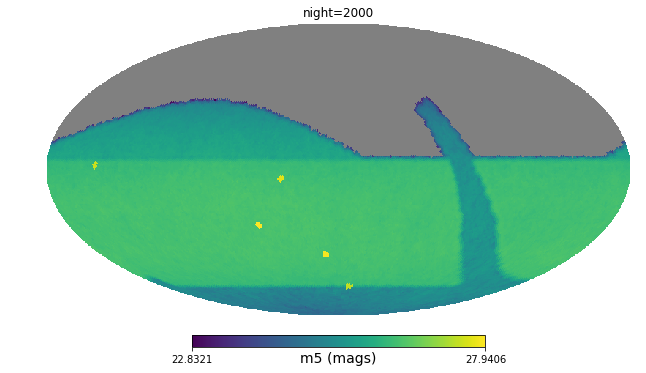

In [4]:
# Now, each vertical slice of the above map is a healpix map of the coadded depth
night = 2000
hp.mollview(bundle.metricValues[:,night], title='night=%i' % night, unit='m5 (mags)')